In [27]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np, numpy.ma as ma
import pandas as pd
from cartopy import crs as ccrs
from skimage.exposure import adjust_gamma, rescale_intensity

In [17]:
# OR_ABI-L2-MCMIPM2-M6_G16_s20223362030552_e20223362031017_c20223362031113.nc
# MCMIPM2

file_name = 'data/OR_ABI-L2-CMIPM1-M6C03_G16_s20222972000281_e20222972000339_c20222972000396.nc'
ch3 = xr.open_dataset(file_name, engine='h5netcdf')

file_name = 'data/OR_ABI-L2-CMIPM1-M6C13_G16_s20222972000281_e20222972000350_c20222972000416.nc'
ch13 = xr.open_dataset(file_name, engine='h5netcdf')

In [18]:
ch3

<xarray.Dataset>
Dimensions:                                           (y: 1000, x: 1000,
                                                       number_of_time_bounds: 2,
                                                       number_of_image_bounds: 2,
                                                       band: 1)
Coordinates:
    t                                                 datetime64[ns] ...
  * y                                                 (y) float64 0.1019 ... ...
  * x                                                 (x) float64 -0.06663 .....
    y_image                                           float32 ...
    x_image                                           float32 ...
    band_wavelength                                   (band) float32 ...
    band_id                                           (band) int32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                band
Data variables: (12/35)
    CMI                                               (y, x) float32 ...
    DQF                                               (y, x) float32 ...
    time_bounds                                       (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                            int32 ...
    y_image_bounds                                    (number_of_image_bounds) float32 ...
    x_image_bounds                                    (number_of_image_bounds) float32 ...
    ...                                                ...
    focal_plane_temperature_threshold_exceeded_count  float64 ...
    maximum_focal_plane_temperature                   float32 ...
    focal_plane_temperature_threshold_increasing      float32 ...
    focal_plane_temperature_threshold_decreasing      float32 ...
    channel_integration_time                          float64 ...
    channel_gain_field                                float64 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2022-10-24T20:00:28.1Z
    time_coverage_end:         2022-10-24T20:00:33.9Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        e97d1964-7f2a-45b2-a203-468f297ae242

Refresher on initiating matplotlib plots

|Command|Description|
|-------|-----------|
| ```fig = plt.figure()``` | Initiates an empty plot |
| ```fig, ax = plt.subplot(ijk)``` | Initiates subplots with i rows, j columns. Returns one axis (ax) |
| ```fig, axes = plt.subplots([i, j])``` | Initiates subplots with i rows and j |

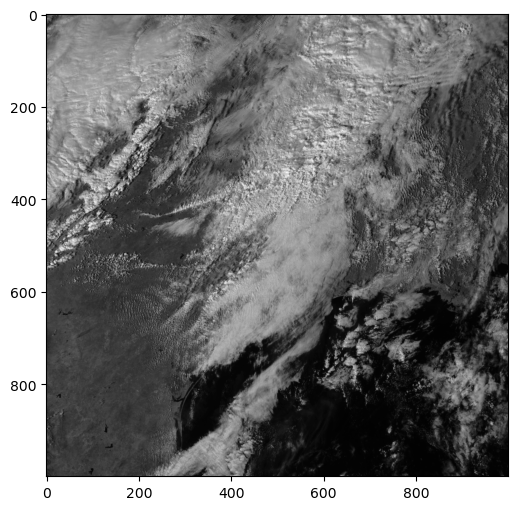

In [19]:
plt.figure(figsize=[6,6])
plt.imshow(ch3.CMI, cmap=plt.get_cmap("Greys_r"))
# plt.xticks([])
# plt.yticks([])
plt.show()

In [20]:
ch13 = abi_ch13.CMI.values
ch3 = abi_ch3.CMI.values

In [21]:
ch3 = ch3[::2, ::2]
ch3.shape, ch3.shape

((500, 500), (500, 500))

In [22]:
ch13.shape, ch3.shape

((500, 500), (500, 500))

In [25]:
diff = ch3 - ch13

mask = (ch13 > 240) | (ch13 < 200)
ch13_masked = ch13
ch13_masked[mask] = np.nan

sandwich = ch3 - ch13_masked

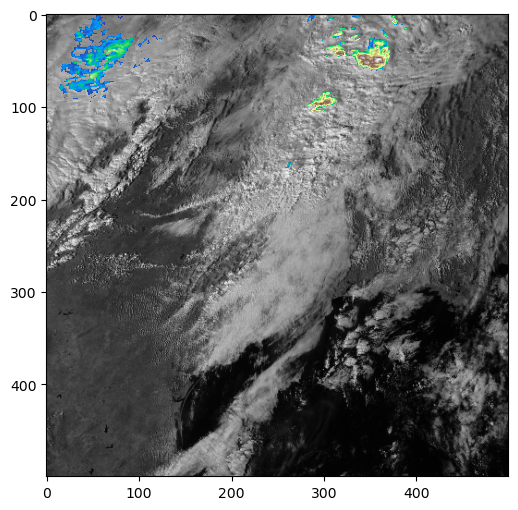

In [26]:
plt.figure(figsize=[6,6])
plt.imshow(ch3, cmap=plt.get_cmap("Greys_r"))
plt.imshow(sandwich, cmap=plt.get_cmap("terrain"))
plt.show()

# True Color RGB

True Color RGB quick guide: https://cimss.ssec.wisc.edu/goes/OCLOFactSheetPDFs/ABIQuickGuide_CIMSSRGB_v2.pdf

GOES-16 channel list: https://www.goes-r.gov/mission/ABI-bands-quick-info.html


|Color|central wavelength (µm)|channel| regrid | min - max | gamma |
|----|---|---|---|---|---|
|Red |0.64|2| yes |-6.7 to 2.6 C|1|
|Green|0.45\*Red + 0.1\*Veggie + 0.45\*Blue|2,3,1| yes| -0.5 to 20.0 C|1|
|Blue|0.47|1|no|-11.95 to 15.55 C |1|


In [ ]:
# Import ABI Channel 1 (blue)
file_name = 'data/OR_ABI-L2-CMIPM1-M6C01_G16_s20222972000281_e20222972000339_c20222972000396.nc'
ch1 = xr.open_dataset(file_name, engine='netcdf4').CMI

# Import ABI Channel 2 (red)
file_name = 'data/OR_ABI-L2-CMIPM1-M6C02_G16_s20222972000281_e20222972000339_c20222972000400.nc'
ch2 = xr.open_dataset(file_name, engine='netcdf4').CMI

# Import ABI Channel 3 (veggie)
file_name = 'data/OR_ABI-L2-CMIPM1-M6C03_G16_s20222972000281_e20222972000339_c20222972000396.nc'
ch3 = xr.open_dataset(file_name, engine='netcdf4').CMI

In [ ]:
# Resize ch2
ch1.shape, ch2.shape, ch3.shape

((1000, 1000), (2000, 2000), (1000, 1000))

In [ ]:
ch2 = ch2[::2,::2]

In [ ]:
green = 0.45*ch2 + 0.1*ch3 + 0.45*ch2

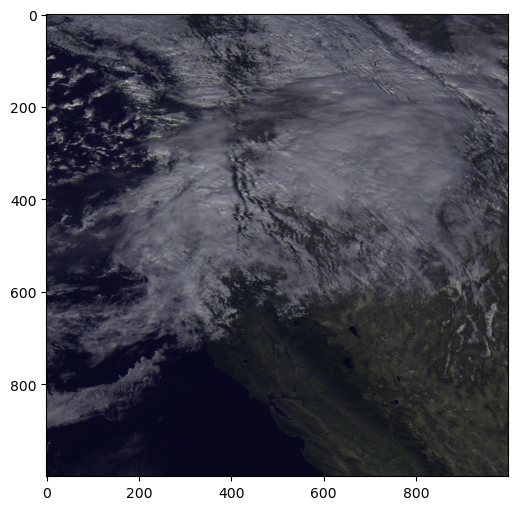

In [ ]:
plt.figure(figsize=[6,6])
plt.imshow(rgb)
plt.show()

# Dust RGB

Dust RGB quick guide: https://rammb.cira.colostate.edu/training/visit/quick_guides/Dust_RGB_Quick_Guide.pdf

GOES-16 channel list: https://www.goes-r.gov/mission/ABI-bands-quick-info.html


|Color|central wavelength (µm)|channel| regrid | min - max (K) | gamma |
|----|---|---|---|---|---|
|Red |12.3 - 10.3|15 - 13| no | -6.7 to 2.6 |1|
|Green|11.2 - 8.2|14 - 11| no | -0.5 to 20.0 |2.5|
|Blue|10.3 |13| no | 261.2 to 288.7 |1|


In [ ]:
file_name = 'data/OR_ABI-L2-CMIPM1-M6C11_G16_s20222972000281_e20222972000339_c20222972000397.nc'
ch11 = xr.open_dataset(file_name).CMI

file_name = 'data/OR_ABI-L2-CMIPM1-M6C13_G16_s20222972000281_e20222972000350_c20222972000416.nc'
ch13 = xr.open_dataset(file_name).CMI

file_name = 'data/OR_ABI-L2-CMIPM1-M6C14_G16_s20222972000281_e20222972000339_c20222972000411.nc'
ch14 = xr.open_dataset(file_name).CMI

file_name = 'data/OR_ABI-L2-CMIPM1-M6C15_G16_s20222972000281_e20222972000344_c20222972000411.nc'
ch15 = xr.open_dataset(file_name).CMI


In [ ]:
img = ch15-ch13
# Rescale and adjust gamma
# np.clip()
img = rescale_intensity(img, in_range=(-6.7, 2.6), out_range=(0,1))
red = adjust_gamma(img, 1.0)

img = ch14-ch11
# Rescale and adjust gamma
img = rescale_intensity(img, in_range=(-0.5, 20.0), out_range=(0,1))
green = adjust_gamma(img, 2.5)

img = ch13
# Rescale and adjust gamma
img = rescale_intensity(img, in_range=(261.2, 288.7), out_range=(0,1))
blue = adjust_gamma(img, 1.0)

In [ ]:
rgb = np.stack([red, green, blue], axis=2)

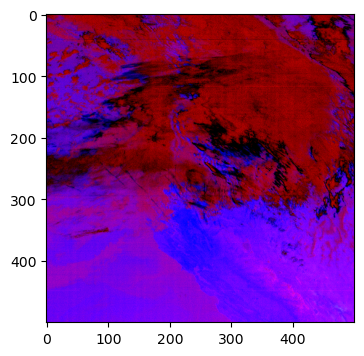

In [ ]:
plt.figure(figsize=[4,4])
plt.imshow(rgb)
plt.show()